# Network

A lot of data can be represented by a network. For example, [train isochrones](https://www.chronotrains.com/), [protein structures](https://www.deepmind.com/research/highlighted-research/alphafold), social network, financial transactions, internet, etc. These information is hard to embed in tabular formats and to be learned by traditional machine learning algorithms you have been taught. Some recent developments using neural networks have been made and are quite exciting. Today we start from the very simple networks and learn how to process them using NetworkX in Python.

# NetworkX

We first import the packages.

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format = "retina"

There are several ways to create a graph, add nodes and edges.

In [5]:
G = nx.Graph() # intialize variable
G.add_node(1)
G.add_node(2)
G.add_node(3)

In [ ]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3]) # this is the same as above, adding 3 nodes in one line

In [6]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_edge(1, 2) # Adding edge cases (e.g. A = (0 1 1) (1 0 1) (1 1 0)
G.add_edge(2, 3)
G.add_edge(1, 3)

In [7]:
G = nx.Graph()
G.add_nodes_from([1, 2, 3])
G.add_edges_from([(1, 2), (2, 3), (1, 3)]) #same as above in one line

We can also insepect the neighbors.

In [8]:
list(nx.neighbors(G, 2))

[1, 3]

And draw a graph.

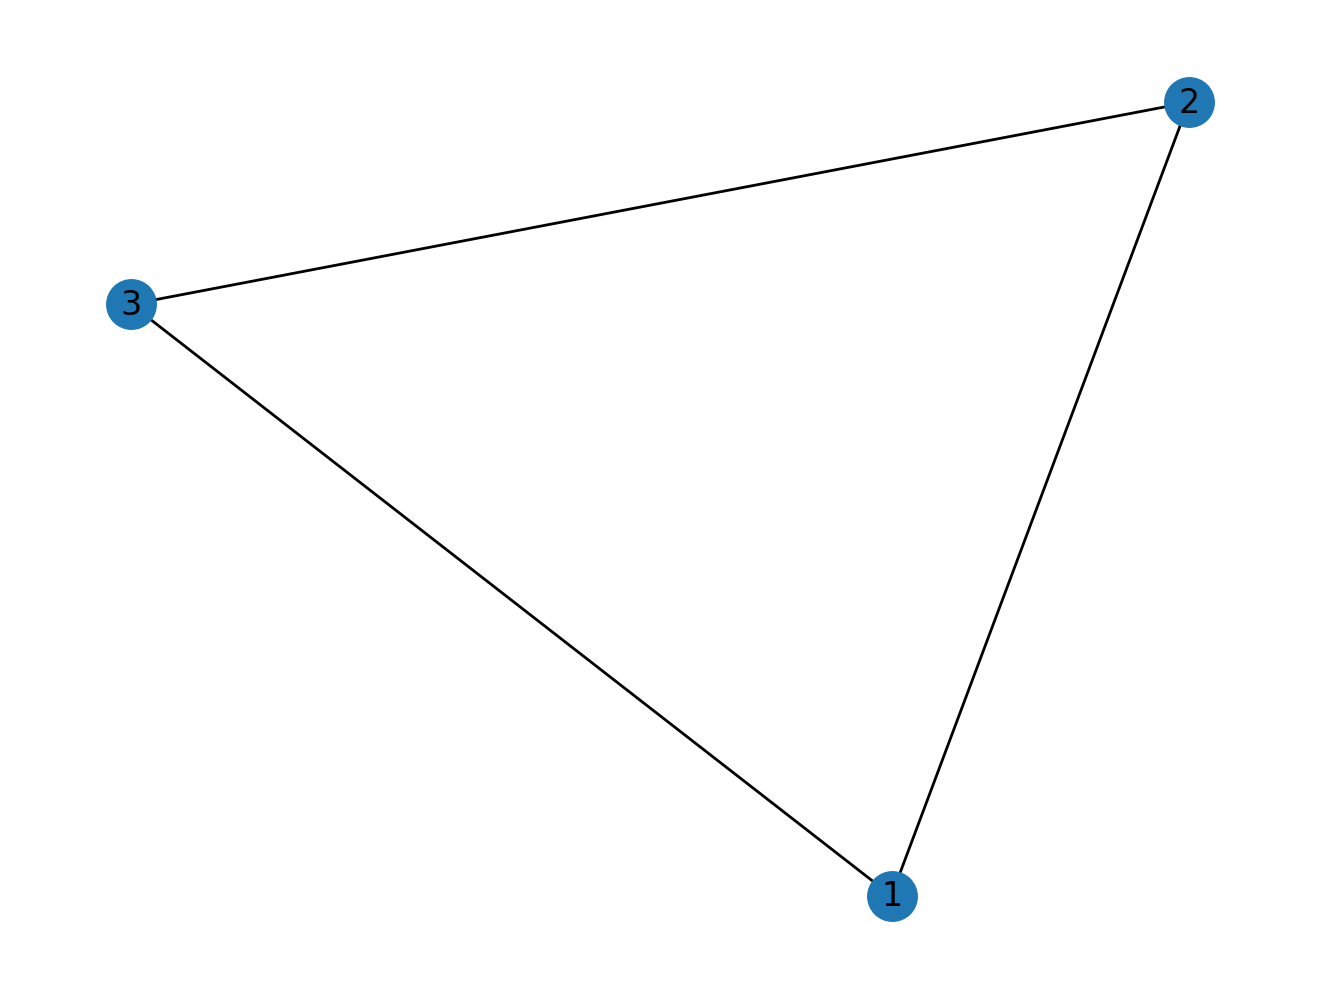

In [11]:
nx.draw(G, with_labels=True) # with labels are the numebrs inside

# Games of Centralities

Now we have some basic understanding of how NetworkX works. We can create a network from Games of Thrones. The data is open sourced at [GitHub](https://github.com/mathbeveridge/gameofthrones). These networks were created by parsing [fan-generated scripts](https://genius.com/artists/Game-of-thrones). Pairs of characters are connected by undirected edges weighted by the number of interactions. There are five interaction types. Character A and Character B are connected whenever:

- Character A speaks directly after Character B
- Character A speaks about Character B
- Character C speaks about Character A and Character B
- Character A and Character B are mentioned in the same stage direction
- Character A and Character B appear in a scene together

We first read the `.csv` file from the github repository.

In [12]:
s1 = pd.read_csv("https://github.com/mathbeveridge/gameofthrones/raw/master/data/got-s1-edges.csv")

And inspect the data.

In [16]:
s1.head() # weight = number of conversations

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


Now, we can create a graph using `from_pandas_edgelist()` and calculate the centrality, which indicates the importance of any given node in a network, using `degree_centrality()`.

In [17]:
G = nx.from_pandas_edgelist(s1, source="Source", target="Target", edge_attr="Weight")
centrality = nx.degree_centrality(G)
pd.Series(centrality).sort_values(ascending=False).head(5)

NED        0.456
TYRION     0.328
ROBERT     0.288
CATELYN    0.288
ROBB       0.240
dtype: float64

We can abstract it into a function to calculate the centrality for each season.

In [18]:
def calculate_centrality(season):
    """
    Return 5 characters with highest centrality.
    """
    s = pd.read_csv(f"https://github.com/mathbeveridge/gameofthrones/raw/master/data/got-s{season}-edges.csv")
    G = nx.from_pandas_edgelist(s, source="Source", target="Target", edge_attr="Weight")
    centrality = nx.degree_centrality(G)
    return pd.Series(centrality).sort_values(ascending=False).head(5)

In [22]:
calculate_centrality(1)

NED        0.456
TYRION     0.328
ROBERT     0.288
CATELYN    0.288
ROBB       0.240
dtype: float64

In [23]:
calculate_centrality(2)

JOFFREY    0.281250
TYRION     0.257812
CERSEI     0.242188
ROBB       0.218750
ARYA       0.210938
dtype: float64

In [24]:
calculate_centrality(3)

ROBB       0.252033
TYWIN      0.235772
TYRION     0.203252
CATELYN    0.178862
JOFFREY    0.170732
dtype: float64

In [25]:
calculate_centrality(4)

JOFFREY    0.233918
TYRION     0.222222
CERSEI     0.192982
SANSA      0.181287
JON        0.175439
dtype: float64

We can also calculate the shortest path.

In [31]:
nx.shortest_path(G, source="THEON", target="DAENERYS", weight=None)

['THEON', 'NED', 'DAENERYS']

For Dijkstra's shortest path algorithm on the exercise, you can refer to the tutorial on [Brillant](https://brilliant.org/wiki/dijkstras-short-path-finder/). We have 3 variables:

- `dist`: an array of distances from the source node ss to each node in the graph.
- `Q`: a queue of all nodes in the graph. At the end of the algorithm's progress, Q will be empty.
- `S`: an empty set, to indicate which nodes the algorithm has visited. At the end of the algorithm's run, S will contain all the nodes of the graph.

The algorithm can be written as:

```
function Dijkstra(Graph, source):
       dist[source]  := 0                     // Distance from source to source is set to 0
       for each vertex v in Graph:            // Initializations
           if v ≠ source
               dist[v]  := infinity           // Unknown distance function from source to each node set to infinity
           add v to Q                         // All nodes initially in Q

      while Q is not empty:                  // The main loop
          v := vertex in Q with min dist[v]  // In the first run-through, this vertex is the source node
          remove v from Q 

          for each neighbor u of v:           // where neighbor u has not yet been removed from Q.
              alt := dist[v] + length(v, u)
              if alt < dist[u]:               // A shorter path to u has been found
                  dist[u]  := alt            // Update distance of u 

      return dist[]
  end function
```
# Further Reading

[Chronotrains](https://www.chronotrains.com/)  
[Direkt Bahn Guru](https://direkt.bahn.guru/)  
[AlphaFold](https://www.deepmind.com/research/highlighted-research/alphafold)  
[CS224W: Machine Learning with Graphs](http://web.stanford.edu/class/cs224w/)